# CSC2034 Data Science Project

Importing all necessary files

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, auc, roc_curve, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.svm import SVC, SVR
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")

Saving the data from winequality-red.csv and winequality-white.csv into red_wine_data and white_wine_data datasets.

In [ ]:
red_wine_data = pd.read_csv("winequality-red.csv", header = 0, sep = ";")
white_wine_data = pd.read_csv("winequality-white.csv", header = 0, sep= ";")

# 1.A: Analyzing Wine Quality Distribution Across Red and White Wines

Plotting the quality distribution of both red and white wines, and then creating subplots to compare their quality distributions.

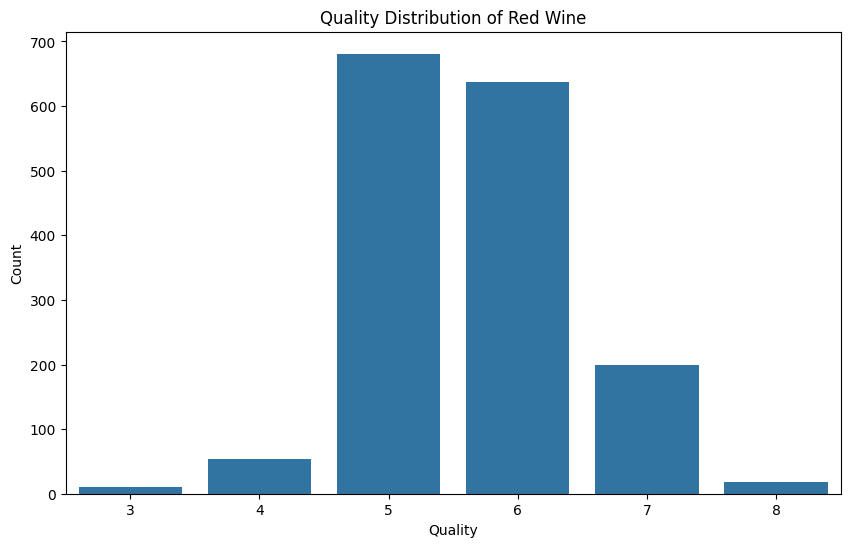

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x = "quality", data = red_wine_data)
plt.title("Quality Distribution of Red Wine")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

The quality of red wines is distributed across 3 to 8. Most of the wines have a quality value of either 5 or 6, with 5 being the most frequently occurring rating.

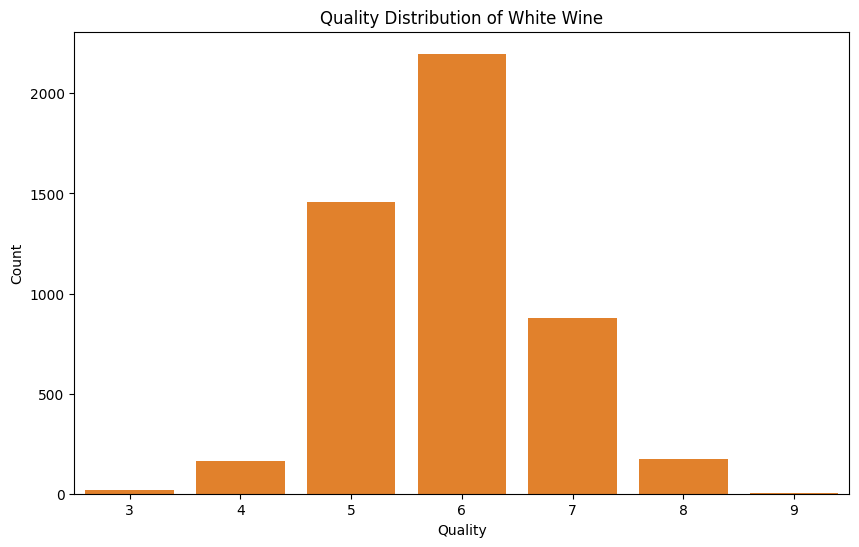

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x = "quality", data = white_wine_data, color="#ff7f0e")
plt.title("Quality Distribution of White Wine")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

The quality of white wines is distributed across 3 to 9. Just like red wine, the three most frequent ratings are 5, 6, and 7. But in this case, 6 occures the most.

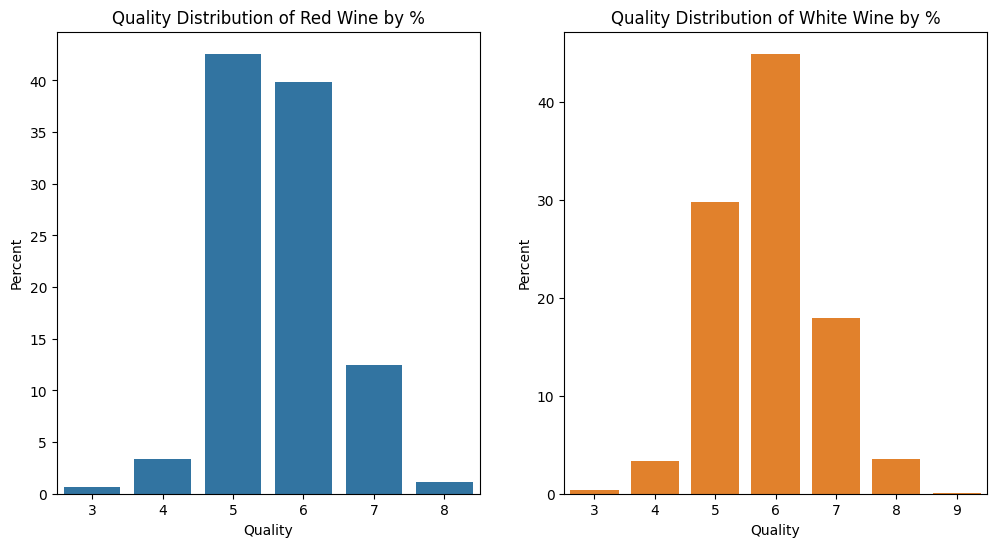

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12, 6))

sns.countplot(x = "quality", data = red_wine_data, stat="percent", ax=ax[0])
ax[0].set_title("Quality Distribution of Red Wine by %")
ax[0].set_xlabel("Quality")
ax[0].set_ylabel("Percent")

sns.countplot(x = "quality", data = white_wine_data, color="#ff7f0e", stat="percent", ax=ax[1])
ax[1].set_title("Quality Distribution of White Wine by %")
ax[1].set_xlabel("Quality")
ax[1].set_ylabel("Percent")
fig.show()

For this graph, to compare the quality distributions between red and white wines, I used percentage instead of count because the number of data points in the white wines dataset is a lot more than in the red wines dataset.

By looking at these graphs, it becomes clear that the overall quality of white wines is better than the quality of red wines as the percentage of quality 6 and higher in white wine is more than the red wines.


#1.B: Discretising Alcohol Content Variables into Three Categories for Red and White Wines

Discretising alcohol content in low, mid and high categories. I am using the mean alcohol content and standard deviation to decide which category a certain alcohol belongs in and adding them to a new variable named alcohol_cat.

In [ ]:
def alcohol_content(wine):
  """This function takes a dataset and uses the alcohol variable to create a new alcohol_cat variable"""
  wine_mean = wine["alcohol"].mean()
  wine_stddev = wine["alcohol"].std()

  low_alcohol = wine_mean - wine_stddev
  high_alcohol = wine_mean + wine_stddev

  wine["alcohol_cat"] = ["low" if value < low_alcohol else
                        ("mid" if low_alcohol <= value <= high_alcohol else "high")
                        for value in wine["alcohol"]]

alcohol_content(red_wine_data)
alcohol_content(white_wine_data)

# 1.C: Analysis of Wine Quality Distribution Across Different Alcohol Content Levels

Plotting the quality distribution of both red and white wines, but separately for low, mid, and high-alcohol content. After this, I plotted all of them together with different hues to understand the relationship between alcohol content and wine quality.

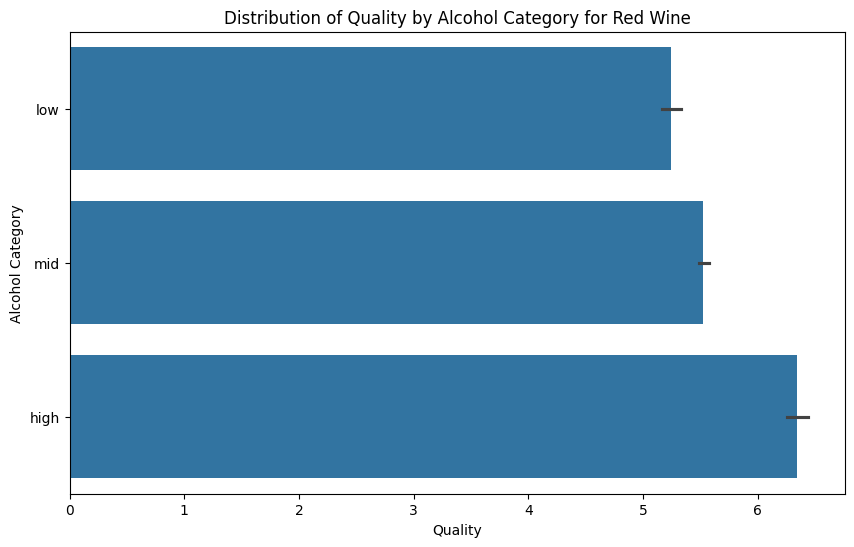

In [ ]:
order_list = ['low', 'mid', 'high']

plt.figure(figsize = (10,6))
sns.barplot(y = "alcohol_cat", x = "quality", data = red_wine_data, order = order_list)
plt.title("Distribution of Quality by Alcohol Category for Red Wine")
plt.ylabel("Alcohol Category")
plt.xlabel("Quality")
plt.show()
plt.close()

By looking at this graph, we can conclude that having a higher alcohol content generally leads to having a higher quality for red wines.

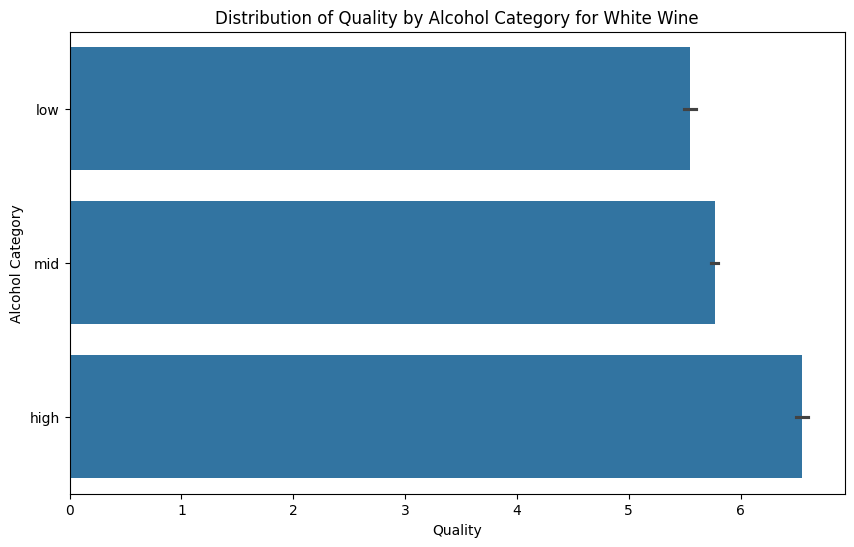

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = "alcohol_cat", x = "quality", data = white_wine_data, order = order_list)
plt.title("Distribution of Quality by Alcohol Category for White Wine")
plt.ylabel("Alcohol Category")
plt.xlabel("Quality")
plt.show()
plt.close()

By looking at this graph, we can conclude that having a higher alcohol content generally leads to having a higher quality for white wines.

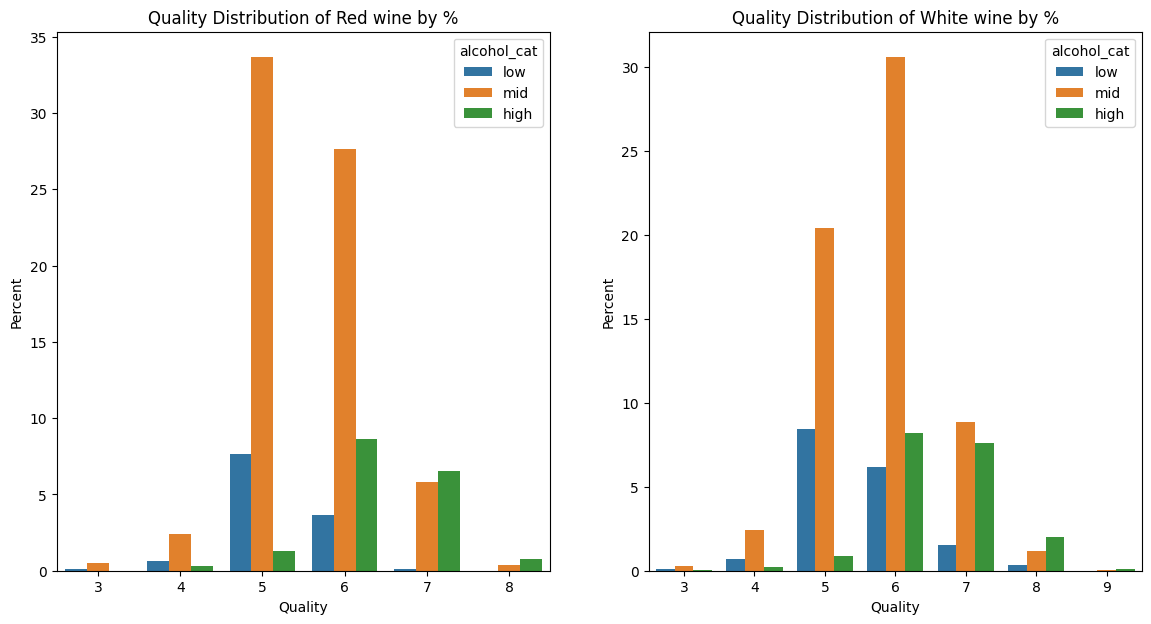

In [ ]:
fig, ax =plt.subplots(1, 2, figsize=(14, 7))

alcohol_order = ['low', 'mid', 'high']
color_mapping = {'low': '#1f77b4', 'mid': '#ff7f0e', 'high': '#2ca02c'}

sns.countplot(x='quality', hue='alcohol_cat', data= red_wine_data, ax=ax[0], palette=color_mapping, stat='percent', hue_order=alcohol_order)
ax[0].set_title("Quality Distribution of Red wine by %")
ax[0].set_xlabel("Quality")
ax[0].set_ylabel("Percent")


sns.countplot(x='quality', hue='alcohol_cat', data= white_wine_data, ax=ax[1], palette=color_mapping, stat='percent', hue_order=alcohol_order)
ax[1].set_title("Quality Distribution of White wine by %")
ax[1].set_xlabel("Quality")
ax[1].set_ylabel("Percent")
plt.show()

By looking at these graphs, it becomes clear that low alcohol content wines are near the range of 5 and 6 quality, mid alcohol content wines are near the range of 5, 6 and 7 quality and high alcohol content wines are near the range of 6, 7 and 8 quality. Looking at this we can also see that mid-quality wines are the most common in the database.

Using that we can easily conclude that the overall quality of both red and white wines increases when they have a higher alcohol content.


# 1.D: Determining Threshold for Sweetness Classification in Wine Based on Residual Sugar

Discretising residual sugar in sweet and dry categories.  After putting them in a category I will be putting them in a new variable called isSweet.


The median for red wine is: 2.2
The mean for red wine is: 2.54


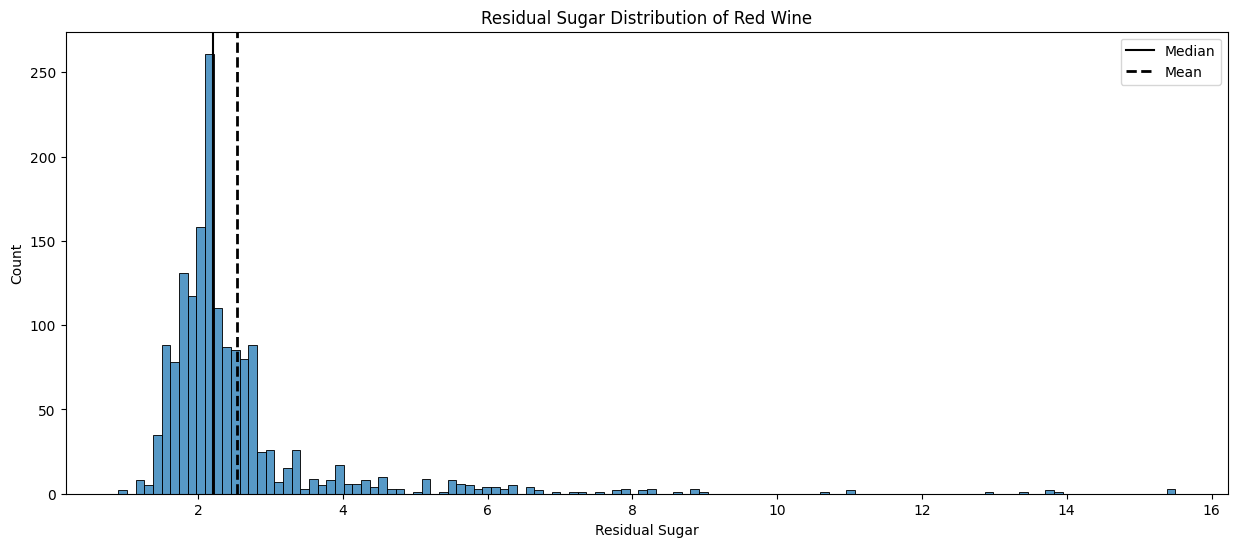

In [ ]:
print(f"The median for red wine is: {red_wine_data['residual sugar'].median()}")
print(f"The mean for red wine is: {red_wine_data['residual sugar'].mean().round(2)}")

plt.figure(figsize = (15, 6))
sns.histplot(x="residual sugar", data=red_wine_data)
plt.axvline(x=red_wine_data["residual sugar"].median(), color="black", label="Median")
plt.axvline(x=red_wine_data["residual sugar"].mean(), lw=2, color="black", ls='--', label="Mean")
plt.title("Residual Sugar Distribution of Red Wine")
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.legend()
plt.show()

Plotting both the mean and median values to see which can divide the graph better. Looking at this it seems like median will be a better fit to distribute the dataset evenly for red wines.

The median for white wine is: 5.2
The mean for white wine is: 6.39


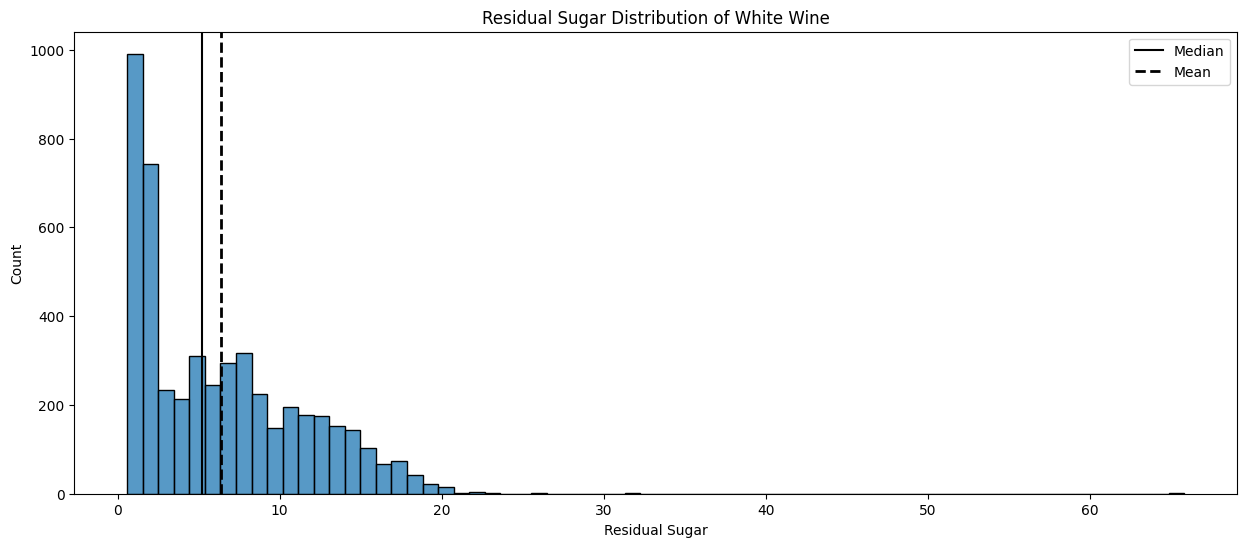

In [ ]:
print(f"The median for white wine is: {white_wine_data['residual sugar'].median()}")
print(f"The mean for white wine is: {white_wine_data['residual sugar'].mean().round(2)}")

plt.figure(figsize = (15, 6))
sns.histplot(x="residual sugar", data=white_wine_data)
plt.axvline(x=white_wine_data["residual sugar"].median(), color="black", label="Median")
plt.axvline(x=white_wine_data["residual sugar"].mean(), lw=2, color="black", ls='--', label="Mean")
plt.title("Residual Sugar Distribution of White Wine")
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.legend()
plt.show()

Plotting both the mean and median values to see which can divide the graph better. Looking at this it seems like median will be a better fit to distribute the dataset evenly for white wines.

Trying to divide the wines dataset evenly using the median value of residual sugar.

In [ ]:
def is_sweet_median(wine):
  wine_median = wine["residual sugar"].median()

  more_threshold = []

  for value in wine["residual sugar"]:
    if value >= wine_median:
      more_threshold.append(value)

  return len(more_threshold)


print(f"Number of Sweet Red Wines using median: {is_sweet_median(red_wine_data)}")
print(f"Number of Dry Red Wines using median: {len(red_wine_data['residual sugar']) - is_sweet_median(red_wine_data)}\n")

print(f"Number of Sweet White Wines using median: {is_sweet_median(white_wine_data)}")
print(f"Number of Dry White Wines using median: {len(white_wine_data['residual sugar']) - is_sweet_median(white_wine_data)}")

Number of Sweet Red Wines using median: 847
Number of Dry Red Wines using median: 752

Number of Sweet White Wines using median: 2458
Number of Dry White Wines using median: 2440


Looking at the result, this confirms that the median is a good value to use to split the datasets evenly for both the wine datasets.

Trying to divide the wines dataset evenly using the mean value of residual sugar.

In [ ]:
def is_sweet_mean(wine):
  wine_mean = wine["residual sugar"].mean()

  more_threshold = []

  for value in wine["residual sugar"]:
    if value >= wine_mean:
      more_threshold.append(value)

  return len(more_threshold)


print(f"Number of Sweet Red Wines using mean: {is_sweet_mean(red_wine_data)}")
print(f"Number of Dry Red Wines using mean: {len(red_wine_data['residual sugar']) - is_sweet_mean(red_wine_data)}\n")

print(f"Number of Sweet Red Wines using mean: {is_sweet_mean(white_wine_data)}")
print(f"Number of Dry Red Wines using mean: {len(white_wine_data['residual sugar']) - is_sweet_mean(white_wine_data)}")

Number of Sweet Red Wines using mean: 435
Number of Dry Red Wines using mean: 1164

Number of Sweet Red Wines using mean: 2161
Number of Dry Red Wines using mean: 2737


Looking at the result, the mean splits both red and white wines in a very lob-sided manner in comparison to the median which gave a much better result. So I disregard the mean split and proceed with splitting the dataset using the median.

In [ ]:
def is_sweet(wine):
  """This function takes a dataset and uses the residual sugar variable to create a new isSweet variable"""
  wine_sugar_median = wine["residual sugar"].median()

  wine["isSweet"] = ["sweet" if value >= wine_sugar_median else
                                  "dry" for value in wine["residual sugar"]]

is_sweet(red_wine_data)
is_sweet(white_wine_data)

Using the median value of residual sugar. Adding the value 'sweet' if the value is greater than the median and 'dry' if the value is lesser than the median to a new variable called isSweet.

#1.E: Analyzing Quality Distribution Based on Sweetness Classification

Plotting the quality distribution of both red and white wines using the isSweet variable, and then creating subplots to compare their quality distributions.

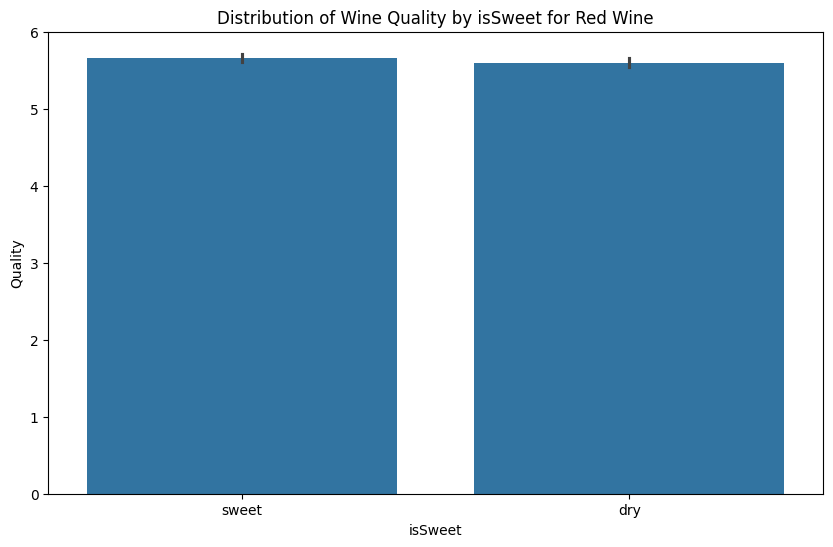

In [ ]:
order_list = ["sweet", "dry"]

plt.figure(figsize = (10,6))
sns.barplot(x = "isSweet", y = "quality", data = red_wine_data, order = order_list)
plt.title("Distribution of Wine Quality by isSweet for Red Wine")
plt.xlabel("isSweet")
plt.ylabel("Quality")
plt.show()
plt.close()

The quality of red wines when compared to sweet or dry. By looking at the graph, we can see that sweeter red wines have a slightly higher quality than dryer red wines.

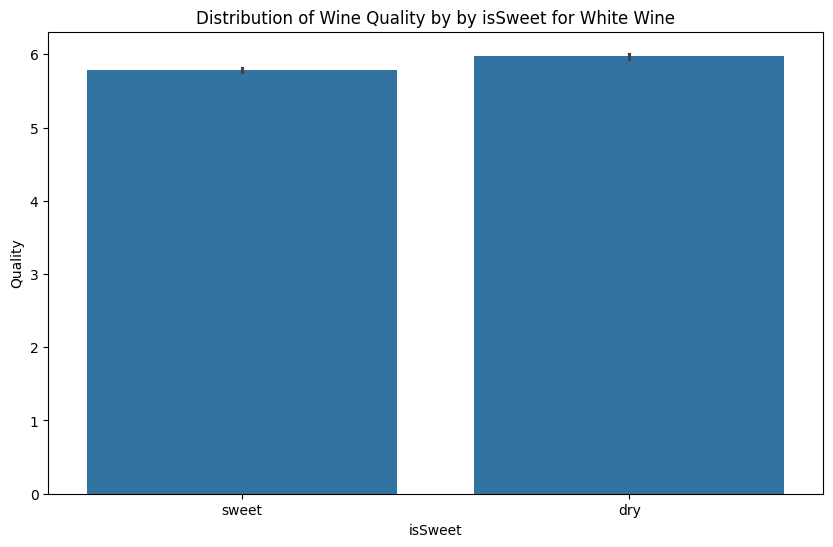

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = "isSweet", y = "quality", data = white_wine_data, order = order_list)
plt.title("Distribution of Wine Quality by by isSweet for White Wine")
plt.xlabel("isSweet")
plt.ylabel("Quality")
plt.show()
plt.close()

The quality of red wines when compared to sweet or dry. By looking at the graph, we can see that sweeter white wines have a slightly lower quality than dryer white wines.

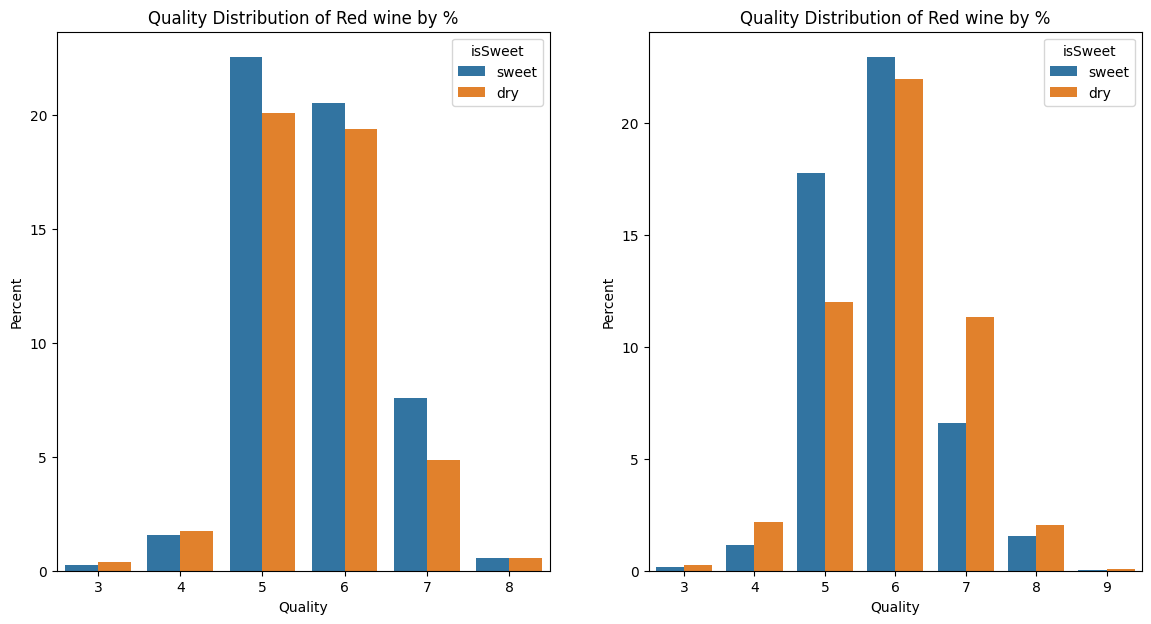

In [ ]:
fig, ax =plt.subplots(1, 2, figsize=(14, 7))

sns.countplot(x='quality', hue='isSweet', data=red_wine_data, ax=ax[0], stat="percent")
ax[0].set_title("Quality Distribution of Red wine by %")
ax[0].set_xlabel("Quality")
ax[0].set_ylabel("Percent")

sns.countplot(x='quality', hue='isSweet', data=white_wine_data, ax=ax[1], stat="percent")
ax[1].set_title("Quality Distribution of Red wine by %")
ax[1].set_xlabel("Quality")
ax[1].set_ylabel("Percent")
plt.show()
plt.close()

An interesting pattern emerges in the graph, where we can see that the lower and higher-quality wines generally tend to be dry and the mid-quality tends to be sweeter.

# 2. Analyzing Correlations for Feature Selection in Machine Learning.







To check what coefficient I should be using, I will make pair plots of all other columns with quality, the target variable.

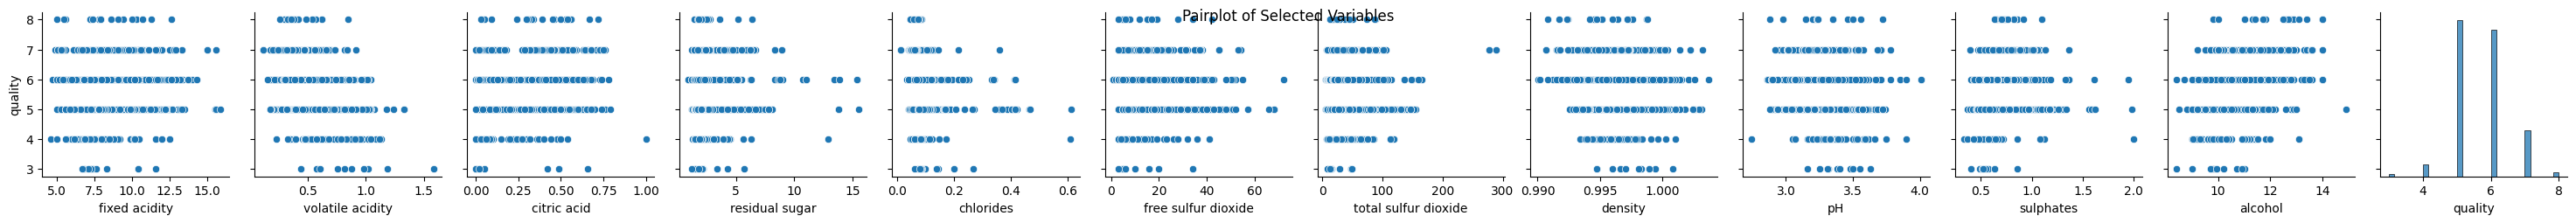

In [ ]:
sns.pairplot(data=red_wine_data,
                  y_vars=['quality'],
                  x_vars=['fixed acidity', 'volatile acidity', 'citric acid',
                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                          'total sulfur dioxide', 'density', 'pH',
                          'sulphates', 'alcohol', 'quality',])
plt.suptitle("Pairplot of Selected Variables")
plt.show()

As quality is an ordinal value using the Spearman method seems like the best choice as it can handle outliers better as well. That is why I chose to go with the Spearman coefficient.

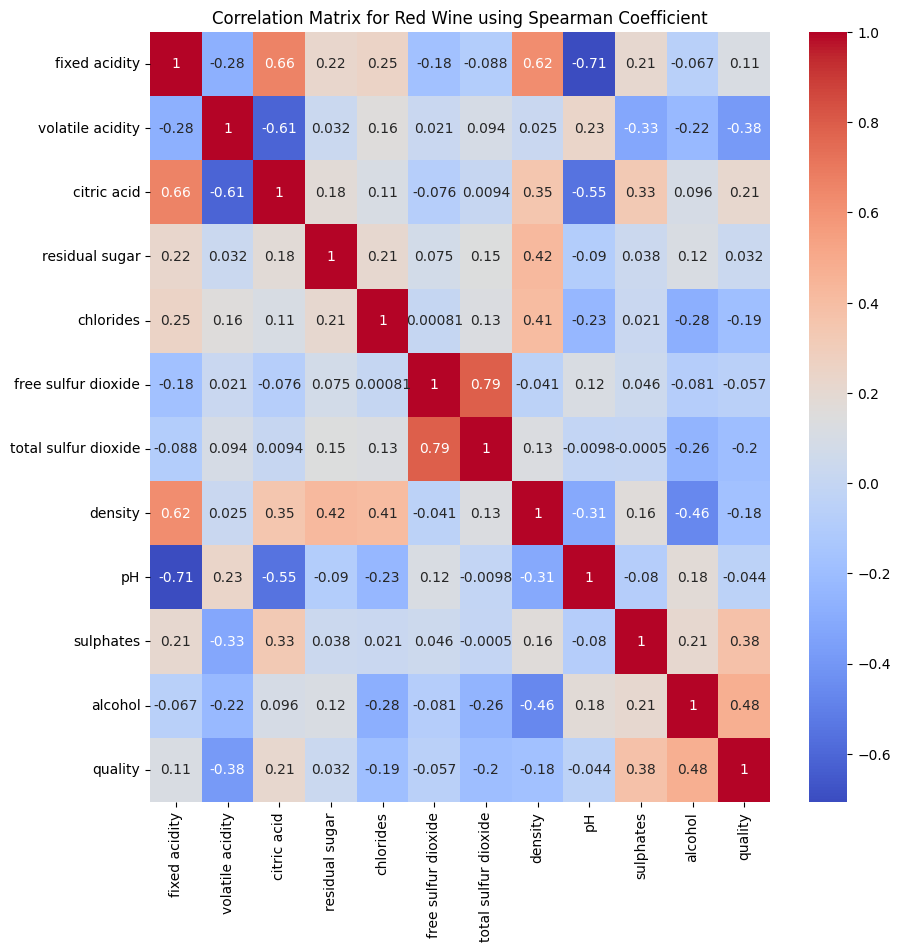

In [ ]:
correlation_matrix = red_wine_data.corr(method="spearman", numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Red Wine using Spearman Coefficient")
plt.show()

This heatmap shows the correlation of each variable with every other variable for red wine. For quality it seems like alcohol, volatile acidity, and sulphates are the variables with the most correlation.

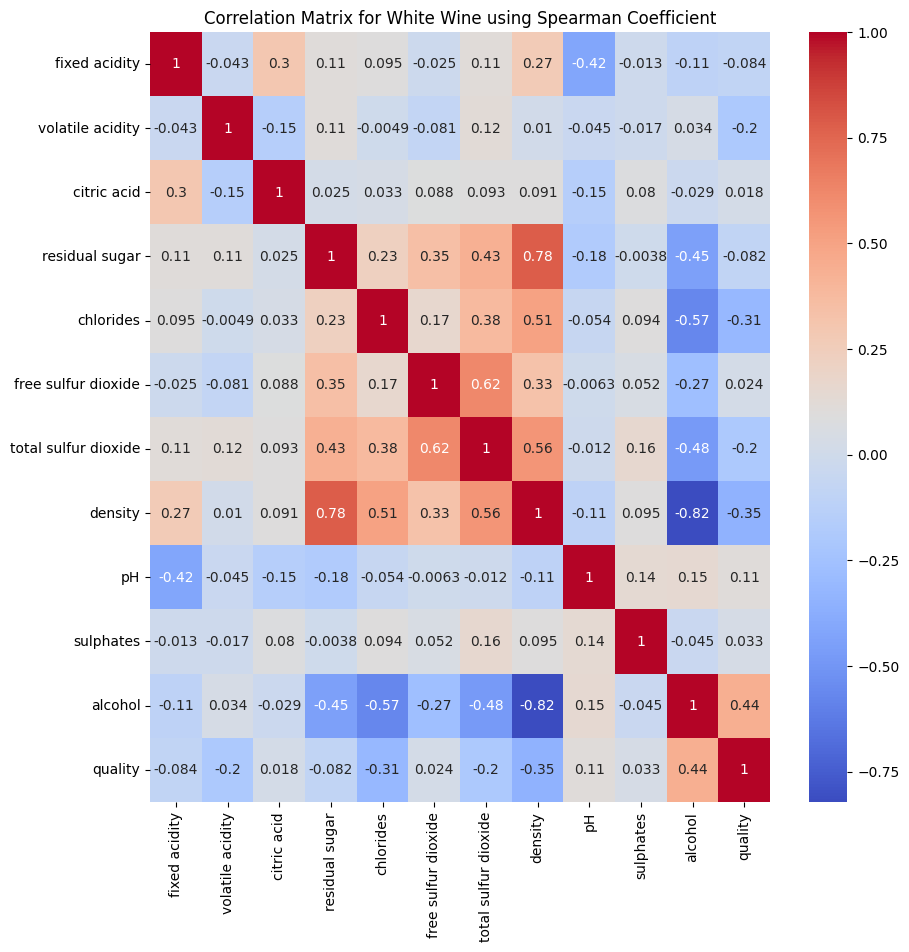

In [ ]:
correlation_matrix = white_wine_data.corr(method="spearman", numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for White Wine using Spearman Coefficient")
plt.show()

This heatmap shows the correlation of each variable with every other variable for white wine. For quality it seems like alcohol, density, chlorides, and volatile acidity are the variables with the most correlation

#3. Predictive Analysis using Classification and Regression Machine Learning Algorithms

In [ ]:
def check_threshold(wine, threshold):
  """This function prints the number of 0 and 1 values for a particular threshold """
  wine['binary_quality'] = wine['quality'].apply(lambda x: 1 if x >= threshold else 0)
  print(f"The values for low and high quality wines with {threshold} ->\n{wine['binary_quality'].value_counts()}\n")

print("Red Wine")
check_threshold(red_wine_data, 5)
check_threshold(red_wine_data, 6)
check_threshold(red_wine_data, 7)

print("Red Wine")
check_threshold(white_wine_data, 5)
check_threshold(white_wine_data, 6)
check_threshold(white_wine_data, 7)

Red Wine
The values for low and high quality wines with 5 ->
1    1536
0      63
Name: binary_quality, dtype: int64

The values for low and high quality wines with 6 ->
1    855
0    744
Name: binary_quality, dtype: int64

The values for low and high quality wines with 7 ->
0    1382
1     217
Name: binary_quality, dtype: int64

Red Wine
The values for low and high quality wines with 5 ->
1    4715
0     183
Name: binary_quality, dtype: int64

The values for low and high quality wines with 6 ->
1    3258
0    1640
Name: binary_quality, dtype: int64

The values for low and high quality wines with 7 ->
0    3838
1    1060
Name: binary_quality, dtype: int64



##3.1(a) Binary Classification using Logistic Regression

Looking at the result it seems like 6 seems to be the best choice for threshold as it has the lowest class imbalance out of the three. So, I will be using 6 as the threshold for all the algorithms.

In [ ]:
def plot_classifier(classifier, data, labels, title, logistic):
  """This function is used to create the best fit line for all classifiers used for classification"""
  data_min, data_max = data.values[:, 0].min(), data.values[:, 0].max()
  w = classifier.coef_[0]
  a = -w[0] / w[1]
  xx = np.linspace(data_min, data_max)
  yy = a * xx - (classifier.intercept_[0]) / w[1]

  fig = plt.figure(figsize=(20,6))
  fig.subplots_adjust(hspace=1, wspace=0.4)

  ax = fig.add_subplot(1, 2, 1)
  sns.scatterplot(x=data.values[:,0],y=data.values[:,1], hue=labels.values.ravel())
  ax.set_title(title)
  ax2 = ax.twinx()
  sns.regplot(x=xx,y=yy, ax=ax2, line_kws={"color": "red"}, scatter = False, logistic=logistic)

  plt.show()
  plt.close()

Creating this function can help avoid similar code. We can just input the classifier, data, labels, title, and whether the classifier is logistic, for testing and training data in both the wines and using different classifiers.

In [ ]:
def wine_logistic(wine, selected_features):
  """This function applies logistic regression on the data and returns multiple
  values that we use in plot_classifier to plot a graph."""

  wine['binary_quality'] = wine['quality'].apply(lambda x: 1 if x >= 6 else 0)

  selected_features = wine[selected_features]
  labels_binary = wine[["binary_quality"]]

  data_train, data_test, labels_train, labels_test = train_test_split(selected_features, labels_binary, train_size=0.8, random_state=42)

  smote = SMOTE(random_state=42)
  data_train_smote, labels_train_smote = smote.fit_resample(data_train, labels_train)

  classifier = LogisticRegression()
  classifier.fit(data_train_smote, labels_train_smote.values.ravel())
  binary_quality_predictions = classifier.predict(data_test)

  print(classification_report(labels_test, binary_quality_predictions))
  return classifier, data_train_smote, data_test, labels_train_smote, labels_test


Created this function to implement logistic regression on the training and test data. I have also used smote to take care of class imbalances which was the case in white wine. This function also returns classifier and data variables which are further used to plot graphs to visualise the classification.

In [ ]:
classifier, data_train, data_test, labels_train, labels_test = wine_logistic(red_wine_data, ["alcohol", "volatile acidity", "sulphates"])

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       141
           1       0.82      0.65      0.73       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.72       320
weighted avg       0.74      0.72      0.73       320



This shows the classification report for logistic regression on red wine data. The accuracy is 73%, pretty good for this algorithm. I have used Smote and have selected features that give me the best accurary and this is the best accuracy I could achieve.

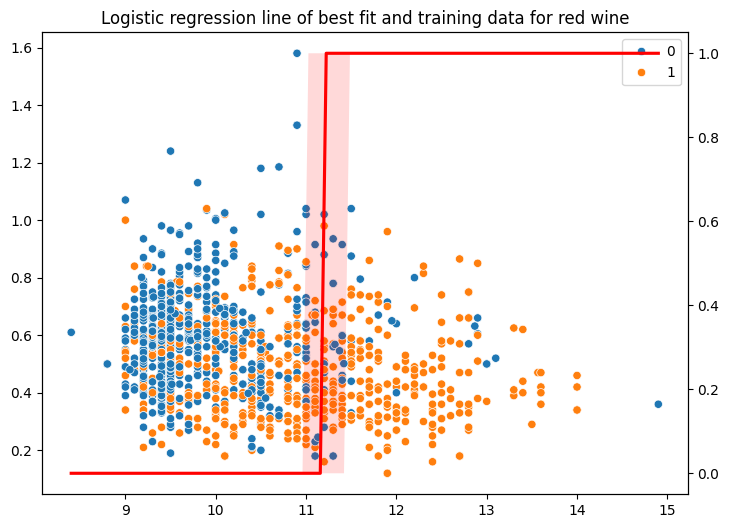

In [ ]:
# Plot for training data for red wine
plot_classifier(classifier, data_train, labels_train, 'Logistic regression line of best fit and training data for red wine', True)

This is the best fit line for logistic regression and **training data** for red wine. As we can see the model has done a decent job with line passing near the center of the data points.

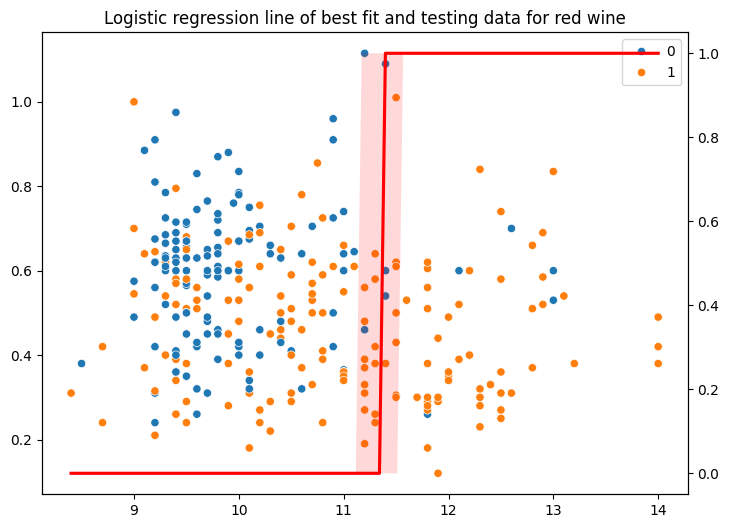

In [ ]:
# Plot for testing data for red wine
plot_classifier(classifier, data_test, labels_test, 'Logistic regression line of best fit and testing data for red wine', True)

This is the best fit line for logistic regression and **testing data** for red wine. As we can see the model has done a decent job with line passing near the center of the data points.

In [ ]:
classifier, data_train, data_test, labels_train, labels_test = wine_logistic(white_wine_data, ["alcohol", "density", "chlorides"])

              precision    recall  f1-score   support

           0       0.50      0.72      0.59       321
           1       0.83      0.65      0.73       659

    accuracy                           0.67       980
   macro avg       0.66      0.69      0.66       980
weighted avg       0.72      0.67      0.68       980



This shows the classification report for logistic regression on trainig data for white wine data. The accuracy is 67%, slightly lesser than red wine.

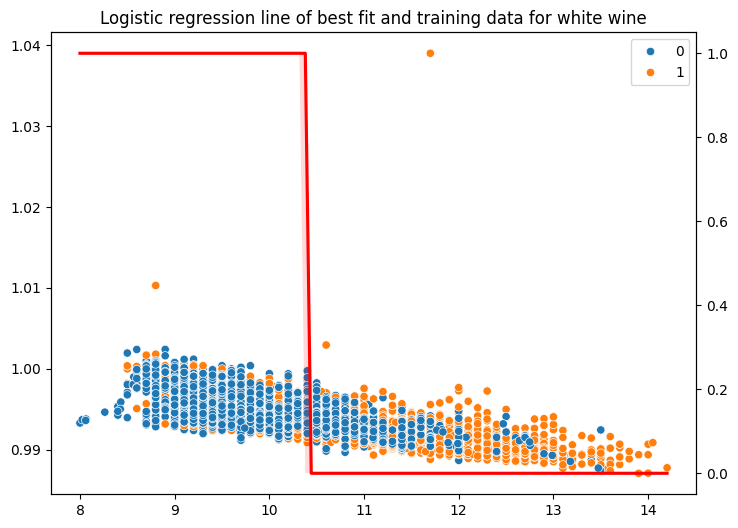

In [ ]:
# Plot for training data
plot_classifier(classifier, data_train, labels_train, 'Logistic regression line of best fit and training data for white wine', True)

This is the best fit line for logistic regression and **training data** for white wine. This graph has normal accurary with line passing near the center of the data points.

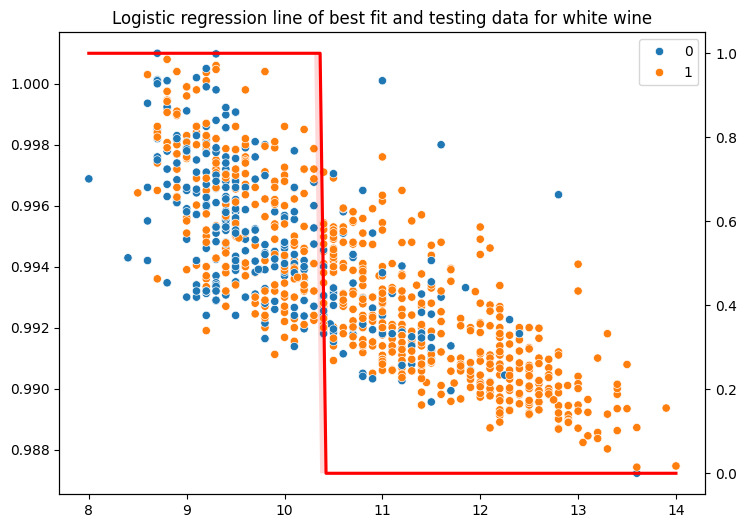

In [ ]:
# Plot for training data
plot_classifier(classifier, data_test, labels_test, 'Logistic regression line of best fit and testing data for white wine', True)

This is the best fit line for logistic regression and **testing data** for white wine. This graph has normal accurary with line passing near the center of the data points.

##3.1(b) Binary Classification using SVC


In [ ]:
def wine_svc(wine, selected_features):
  """This function applies svc on the data and returns multiple values that we
  use in plot_classifier to plot a graph."""

  wine['binary_quality'] = wine['quality'].apply(lambda x: 1 if x >= 6 else 0)

  selected_features = wine[selected_features]
  labels_binary = wine[["binary_quality"]]

  data_train, data_test, labels_train, labels_test = train_test_split(selected_features, labels_binary, train_size=0.8, random_state=42)

  smote = SMOTE(random_state=42)
  data_train_smote, labels_train_smote = smote.fit_resample(data_train, labels_train)

  svc_classifier = SVC(kernel='linear')

  svc_classifier.fit(data_train_smote, labels_train_smote.values.ravel())
  binary_quality_predictions = svc_classifier.predict(data_test)

  print(classification_report(labels_test, binary_quality_predictions))
  return svc_classifier, data_train_smote, data_test, labels_train_smote, labels_test

Created this function to implement svc on the training and test data. I have also used smote to take care of class imbalances which was the case in white wine. This function also returns multiple variables that are later used to plot graphs to visualise this.

In [ ]:
svc_classifier, data_train, data_test, labels_train, labels_test = wine_svc(red_wine_data, ["alcohol", "volatile acidity", "sulphates"])

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       141
           1       0.83      0.65      0.73       179

    accuracy                           0.73       320
   macro avg       0.74      0.74      0.73       320
weighted avg       0.75      0.73      0.73       320



This shows the classification report for logistic regression for red wine data. The accuracy is 73% which is good accuracy. I have used smote and have selected feautures that give me the best accurary and this is the best accuracy I could achieve. The classification report for svc and logistic regression is very similar with some minor differences.

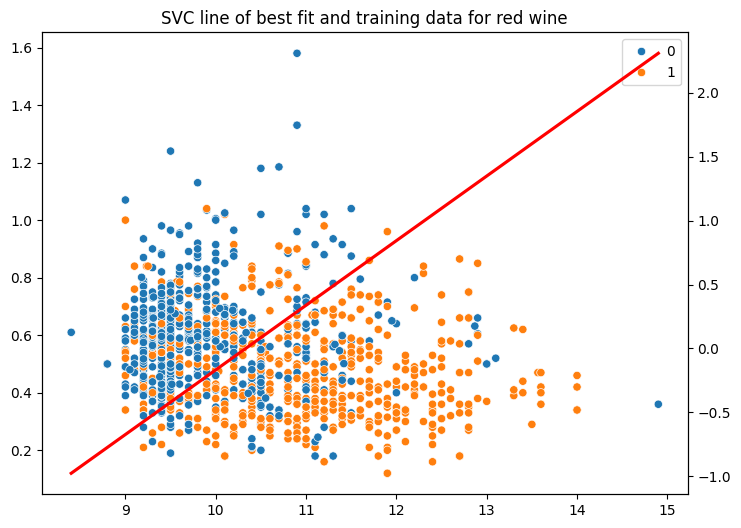

In [ ]:
# Plot for training data for red wine
plot_classifier(svc_classifier, data_train, labels_train, 'SVC line of best fit and training data for red wine', False)

This is the best fit line for svc and **training data** for red wine. It has a good accuracy because the line is passing near the center of the data points.

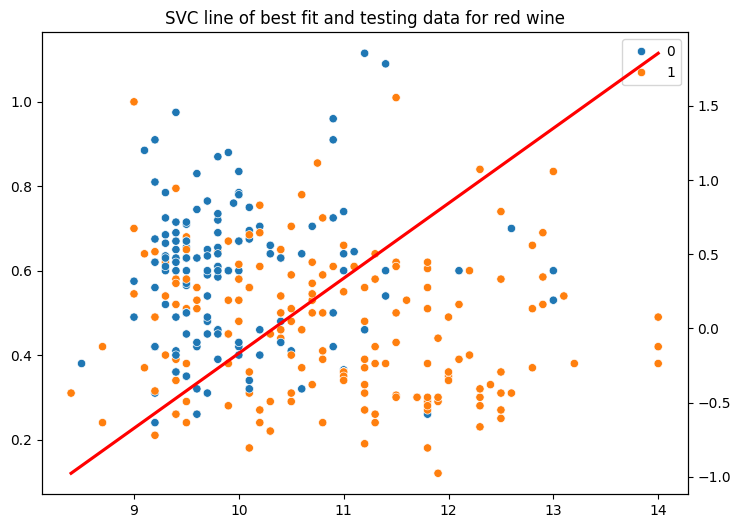

In [ ]:
# Plot for testing data for red wine
plot_classifier(svc_classifier, data_test, labels_test, 'SVC line of best fit and testing data for red wine', False)

This is the best fit line for logistic regression and **testing data** for red wine. It has a good accuracy because the line is passing near the center of the data points.

In [ ]:
svc_classifier, data_train, data_test, labels_train, labels_test = wine_svc(white_wine_data, ["alcohol", "density", "citric acid", "sulphates", "volatile acidity"])

              precision    recall  f1-score   support

           0       0.53      0.71      0.60       321
           1       0.83      0.69      0.75       659

    accuracy                           0.70       980
   macro avg       0.68      0.70      0.68       980
weighted avg       0.73      0.70      0.70       980



This shows the classification report for logistic regression on for white wine data. The accuracy is 70% which seems like okay accuracy. I have used smote and have selected feautures that give me the best accurary and this is the best accuracy I could achieve. The classification report for svc and logistic regression is very similar having only minor changes.

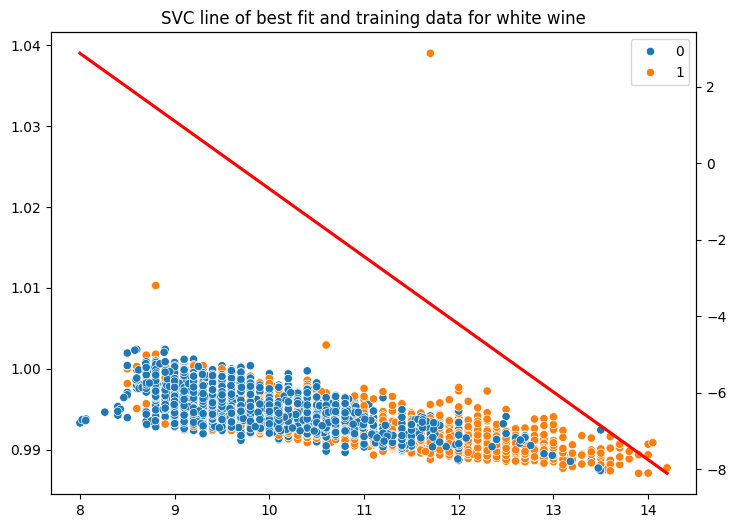

In [ ]:
# Plot for training data for white wine
plot_classifier(svc_classifier, data_train, labels_train, 'SVC line of best fit and training data for white wine', False)

This is the best fit line for svc and **training data** for white wine. There seems to be overfitting here because the line is getting influenced by the outliers. Becuase of the orange dot at 1.04 the line doesn't split the data points well. We can imrove this by trying to remove the data point from the data to have a better best fit line

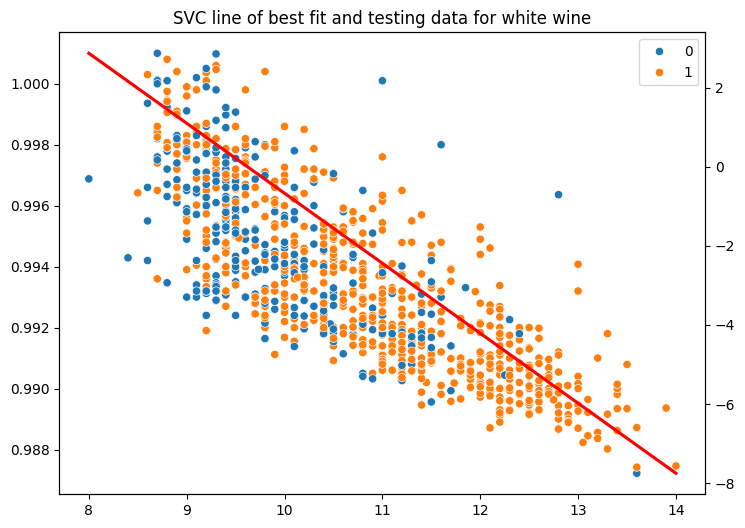

In [ ]:
# Plot for testing data for white wine
plot_classifier(svc_classifier, data_test, labels_test, 'SVC line of best fit and testing data for white wine', False)

This is the best fit line for svc and **testing data** for white wine. The line fits this graph so much better going almost through the middle of data points.

## 3.2(a) Regression using Linear Regression

In [ ]:
def regression_linear_regression(wine, selected_features):
  """This function applies linear regression on the data."""
  selected_features = wine[selected_features]
  labels_quality = wine["quality"]

  data_train, data_test, labels_train, labels_test = train_test_split(selected_features, labels_quality, train_size=0.8, random_state=42)

  scaler = StandardScaler()
  data_train_scaled = scaler.fit_transform(data_train)
  data_test_scaled = scaler.transform(data_test)

  linear_regression = LinearRegression()
  linear_regression.fit(data_train_scaled, labels_train)
  test_predictions = linear_regression.predict(data_test_scaled)

This function implements regression using linear regression taking quality as a continuous variable.

## 3.2(b) Regression using SVR

In [ ]:
def regression_svr(wine, selected_features):
  """This function applies SVR on the data."""
  selected_features = wine[selected_features]
  labels_quality = wine["quality"]

  data_train, data_test, labels_train, labels_test = train_test_split(selected_features, labels_quality, train_size=0.8, random_state=42)

  scaler = StandardScaler()
  data_train_scaled = scaler.fit_transform(data_train)
  data_test_scaled = scaler.transform(data_test)

  svr = SVR(C=1, epsilon=0.3)
  svr.fit(data_train_scaled, labels_train)
  test_predictions = svr.predict(data_test_scaled)

This function implements regression using SVR taking quality as a continuous variable

#4. Model Evaluation with k-Fold Cross Validation

We will be evaluating our results for classification using f1-score, ROC curves, and AUC and for regression we will use MSE, RMSE, and R^2.

##4.1(a) Classification Evaluation for Logistic Regression

In [ ]:
def wine_logistic_validation(wine, selected_features):
  """This function is evaluated using f1-score, ROC curves, AUC"""
  wine['binary_quality'] = wine['quality'].apply(lambda x: 1 if x >= 6 else 0)

  selected_features = wine[selected_features]
  labels_binary = wine["binary_quality"]

  data_train, data_test, labels_train, labels_test = train_test_split(selected_features, labels_binary, train_size=0.8, random_state=42)

  logistic_regression = LogisticRegression()
  logistic_regression.fit(data_train, labels_train)

  binary_quality_predictions = logistic_regression.predict(data_test)

  scores = cross_val_score(logistic_regression, selected_features, labels_binary, cv=5, scoring='f1')

  print("\nCross-Validation F1-scores:", scores)
  print("Mean F1-score: {:.2f}".format(scores.mean()))

  print("\nClassification Report:")
  print(classification_report(labels_test, binary_quality_predictions))

  f1 = f1_score(labels_test, binary_quality_predictions)
  print("F1-score: {:.2f}".format(f1))

  fpr, tpr, thresholds = roc_curve(labels_test, binary_quality_predictions)
  roc_auc = auc(fpr, tpr)
  print("AUC: {:.2f}".format(roc_auc))

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

This function is used to evaluate the binary classifier by giving the f1-score, AUC value, and also plotting the ROC curve graph.


Cross-Validation F1-scores: [0.65762712 0.69565217 0.80357143 0.76470588 0.7696793 ]
Mean F1-score: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       141
           1       0.80      0.69      0.74       179

    accuracy                           0.73       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.73      0.73       320

F1-score: 0.74
AUC: 0.74


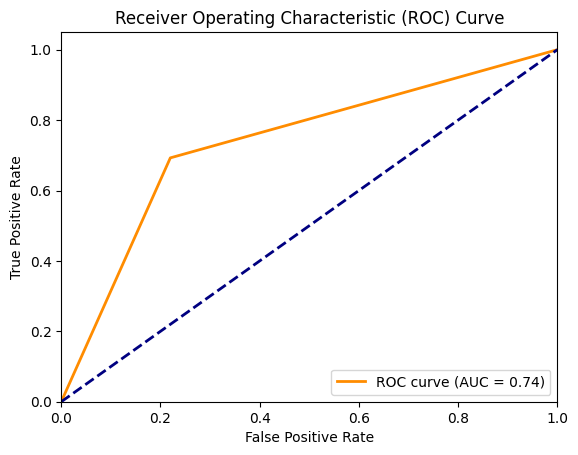

In [ ]:
wine_logistic_validation(red_wine_data, ["volatile acidity", "chlorides", "density", "pH", "sulphates", "alcohol"])

Looking at this graph the all the f1-score, AUC, and ROC curve looks good which reflects good accuracy of 73%.


Cross-Validation F1-scores: [0.75856574 0.79353417 0.83607731 0.83173735 0.81088825]
Mean F1-score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       321
           1       0.76      0.86      0.81       659

    accuracy                           0.72       980
   macro avg       0.68      0.66      0.66       980
weighted avg       0.71      0.72      0.71       980

F1-score: 0.81
AUC: 0.66


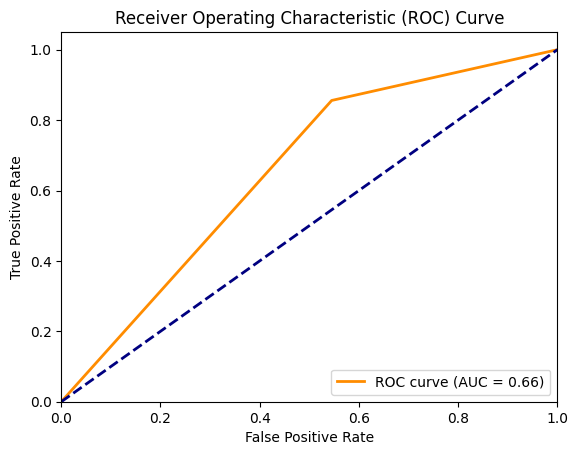

In [ ]:
wine_logistic_validation(white_wine_data, ["density", "alcohol", "volatile acidity"])

Looking at this graph the all the f1-score, AUC, and ROC curve look a little worse than red wine but they still look good showing accuracy of 72%

##4.1(b) Classification Evaluation for SVC

In [ ]:
def svc_validation(wine, selected_features, cv=5):
  """This function is evaluated using f1-score, ROC curves, AUC"""
  wine['binary_quality'] = wine['quality'].apply(lambda x: 1 if x >= 6 else 0)

  selected_features = wine[selected_features]
  labels_binary = wine["binary_quality"]

  data_train, data_test, labels_train, labels_test = train_test_split(selected_features, labels_binary, train_size=0.8, random_state=42)

  smote = SMOTE(random_state=42)
  data_train_smote, labels_train_smote = smote.fit_resample(data_train, labels_train)

  svc_classifier = SVC(kernel='linear')
  svc_classifier.fit(data_train_smote, labels_train_smote.values.ravel())

  binary_quality_predictions = svc_classifier.predict(data_test)

  scores = cross_val_score(svc_classifier, data_train_smote, labels_train_smote, cv=cv, scoring='f1')

  print("\nCross-Validation F1-scores:", scores)
  print("Mean F1-score: {:.2f}".format(scores.mean()))

  print("\nClassification Report:")
  print(classification_report(labels_test, binary_quality_predictions))

  test_f1 = f1_score(labels_test, binary_quality_predictions)
  print("F1-score: {:.2f}".format(test_f1))

  fpr, tpr, thresholds = roc_curve(labels_test, binary_quality_predictions)
  roc_auc = auc(fpr, tpr)
  print("AUC: {:.2f}".format(roc_auc))

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

This function is used to evaluate the binary classifier by giving the f1-score, AUC value, and also plotting the ROC curve graph.


Cross-Validation F1-scores: [0.6381323  0.64754098 0.7007874  0.73643411 0.75      ]
Mean F1-score: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       141
           1       0.83      0.65      0.73       179

    accuracy                           0.73       320
   macro avg       0.74      0.74      0.73       320
weighted avg       0.75      0.73      0.73       320

F1-score: 0.73
AUC: 0.74


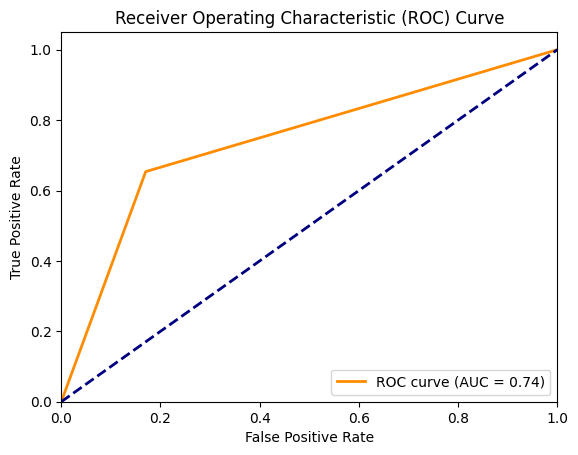

In [ ]:
svc_validation(red_wine_data, ["alcohol", "volatile acidity", "sulphates"])

Looking at this graph the all the f1-score, AUC, and ROC curve looks good which reflects good accuracy of 73%.


Cross-Validation F1-scores: [0.70088845 0.68774704 0.70741483 0.7020649  0.71097684]
Mean F1-score: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61       321
           1       0.83      0.70      0.76       659

    accuracy                           0.70       980
   macro avg       0.68      0.70      0.68       980
weighted avg       0.73      0.70      0.71       980

F1-score: 0.76
AUC: 0.70


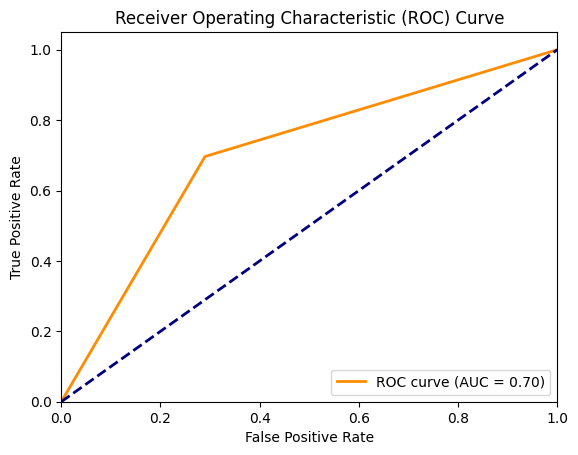

In [ ]:
svc_validation(white_wine_data, ["alcohol", "volatile acidity", "density"])

Looking at this graph the all the f1-score, AUC, and ROC curve look a little worse than red wine but they still look good showing accuracy of 70%

##4.2(a) Regression Evaluation for Linear Regression

In [ ]:
def regression_linear_regression(wine, selected_features):
  """This function gives the cross-validated MSE, cross-validated RMSE,
  and cross-validated R^2 score to check the accuracy of linear regression."""
  selected_features = wine[selected_features]
  labels_quality = wine["quality"]

  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(selected_features)

  linear_regression = LinearRegression()

  scores = cross_val_score(linear_regression, data_scaled, labels_quality, cv=5, scoring='neg_mean_squared_error')
  mse_scores = -scores
  rmse_scores = np.sqrt(mse_scores)
  r2_scores = cross_val_score(linear_regression, data_scaled, labels_quality, cv=5, scoring='r2')

  print("Cross-Validation Mean Squared Error:", round(mse_scores.mean(), 2))
  print("Cross-Validation Root Mean Squared Error (RMSE):", round(rmse_scores.mean(), 2))
  print("Cross-Validation R^2 Score:", round(r2_scores.mean(), 2))


This function helps with the evaluation of linear regression model by printing the cross-validated MSE, cross-validated RMSE, and cross-validated R^2 score.

In [ ]:
regression_linear_regression(red_wine_data, ["volatile acidity", "chlorides", "density", "pH", "sulphates", "alcohol"])

Cross-Validation Mean Squared Error: 0.44
Cross-Validation Root Mean Squared Error (RMSE): 0.66
Cross-Validation R^2 Score: 0.28


The cross-validated MSE, cross-validated RMSE, and cross-validated R^2 scores look fine for red wine, but it seems like the model is prone to false positives.

In [ ]:
regression_linear_regression(white_wine_data, ["fixed acidity", "volatile acidity", "residual sugar", "density", "pH", "sulphates"])

Cross-Validation Mean Squared Error: 0.59
Cross-Validation Root Mean Squared Error (RMSE): 0.77
Cross-Validation R^2 Score: 0.24


The cross-validated MSE, cross-validated RMSE, and cross-validated R^2 scores look a little worse for white wine, which also shows its lower accuracy in comparison to red wine.

##4.2(b) Regression Evaluation for SVR

In [ ]:
def regression_svr(wine, selected_features):
  """This function gives the cross-validated MSE, cross-validated RMSE, and
  cross-validated R^2 score to check the accuracy of svr"""
  selected_features = wine[selected_features]
  labels_quality = wine["quality"]

  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(selected_features)

  svr = SVR(C=1, epsilon=0.3)

  scores = cross_val_score(svr, data_scaled, labels_quality, cv=5, scoring='neg_mean_squared_error')
  mse_scores = -scores
  rmse_scores = np.sqrt(mse_scores)
  r2_scores = cross_val_score(svr, data_scaled, labels_quality, cv=5, scoring='r2')

  print("Cross-Validation Mean Squared Error:", mse_scores.mean())
  print("Cross-Validation Root Mean Squared Error (RMSE):", rmse_scores.mean())
  print("Cross-Validation R^2 Score:", r2_scores.mean())

This function helps with the evaluation of SVR model by printing the cross-validated MSE, cross-validated RMSE, and cross-validated R^2 score.

In [ ]:
regression_svr(red_wine_data, ["volatile acidity", "chlorides", "density", "pH", "sulphates", "alcohol"])

Cross-Validation Mean Squared Error: 0.4308549589455411
Cross-Validation Root Mean Squared Error (RMSE): 0.6561355601499674
Cross-Validation R^2 Score: 0.30084907320461596


The cross-validated MSE, cross-validated RMSE, and cross-validated R^2 scores look fine for red wine. SVR seems to have better values than linear regression, which shows that this dataset works better with SVR.

In [ ]:
regression_svr(white_wine_data, ["fixed acidity", "volatile acidity", "residual sugar", "density", "pH", "sulphates"])

Cross-Validation Mean Squared Error: 0.5726647913637977
Cross-Validation Root Mean Squared Error (RMSE): 0.7548434707984133
Cross-Validation R^2 Score: 0.26299047886049143


The cross-validated MSE, cross-validated RMSE, and cross-validated R^2 scores look fine for white wine. SVR seems to have better values than linear regression, which shows that this dataset works better with SVR.

#5. Extension



#Characterization of Wine Quality Based on Alcohol Content and Sweetness

<Figure size 1000x600 with 0 Axes>

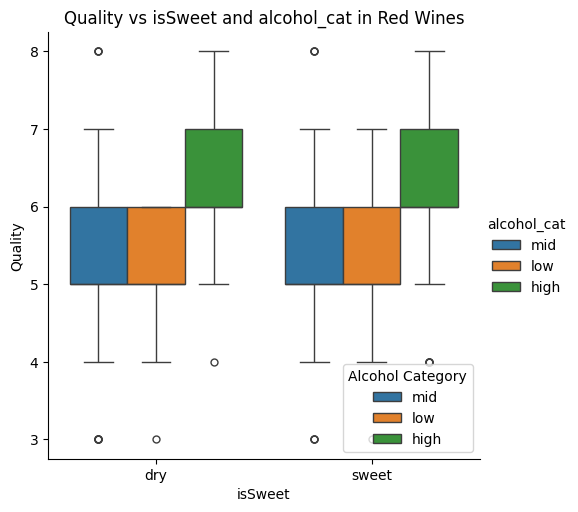

<Figure size 1000x600 with 0 Axes>

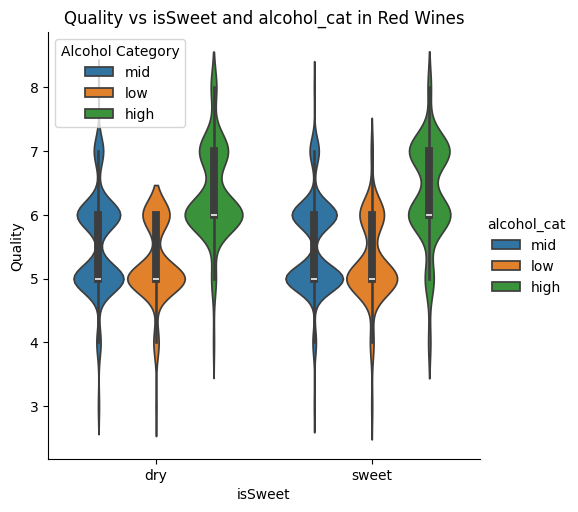

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x = "isSweet", y = "quality", data = red_wine_data, kind = "box", hue = "alcohol_cat")
plt.title('Quality vs isSweet and alcohol_cat in Red Wines')
plt.xlabel('isSweet')
plt.ylabel('Quality')
plt.legend(title='Alcohol Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.catplot(x = "isSweet", y = "quality", data = red_wine_data, kind = "violin", hue = "alcohol_cat")
plt.title('Quality vs isSweet and alcohol_cat in Red Wines')
plt.xlabel('isSweet')
plt.ylabel('Quality')
plt.legend(title='Alcohol Category')
plt.show()

For red wines we can see that low alcohol content wines have a range from 4 up to 6 quality in dry wines whereas they have a range upto 7 in sweet wines. mid wine alcohol content wines have a range from 4 to 7 but have outliers in both 3 and 8 quality for dry and sweet wines. Where as high content wines have range of 5 to 8 with outliers in 4 but none in quality 3  

<Figure size 1000x600 with 0 Axes>

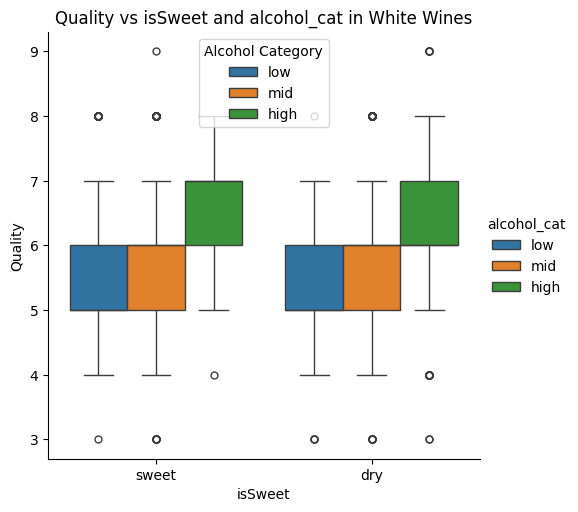

<Figure size 1000x600 with 0 Axes>

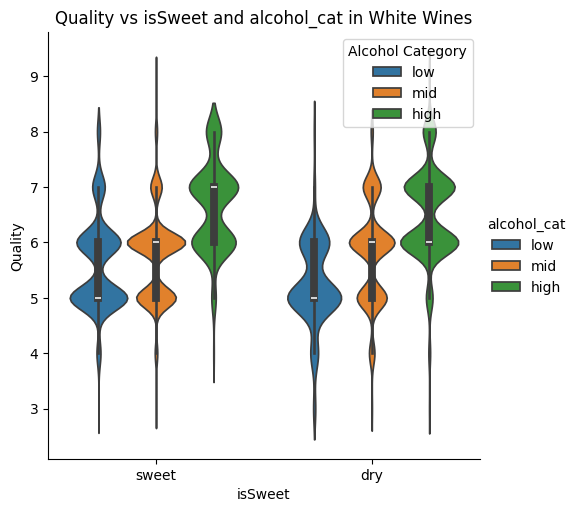

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x = "isSweet", y = "quality", data = white_wine_data, kind = "box", hue = "alcohol_cat")
plt.title('Quality vs isSweet and alcohol_cat in White Wines')
plt.xlabel('isSweet')
plt.ylabel('Quality')
plt.legend(title='Alcohol Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.catplot(x = "isSweet", y = "quality", data = white_wine_data, kind = "violin", hue = "alcohol_cat")
plt.title('Quality vs isSweet and alcohol_cat in White Wines')
plt.xlabel('isSweet')
plt.ylabel('Quality')
plt.legend(title='Alcohol Category')
plt.show()

For white wines we can see that low alcohol content wines have a range up from 4 to 7 with outliers at 3, 8 and 9 quality in dry and sweet wines whereas they have a range upto 7 in sweet wines. mid wine alcohol content wines have a range from 4 to 7 but have outliers in both 3, 8, and 9 quality for dry and sweet wines. Where as high content wines have range of 5 to 8 with outliers in 4 for dry wines and they also have outlier at quality 3 in sweet wines.  

## Comparing Quality Distributions: Combined Analysis without Color Differentiation

<Figure size 1000x600 with 0 Axes>

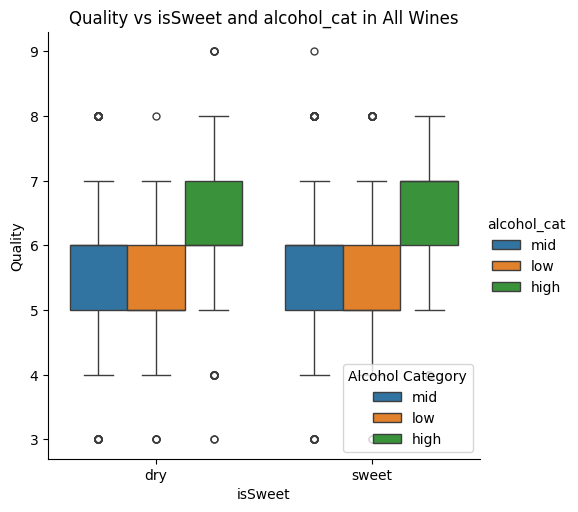

<Figure size 1000x600 with 0 Axes>

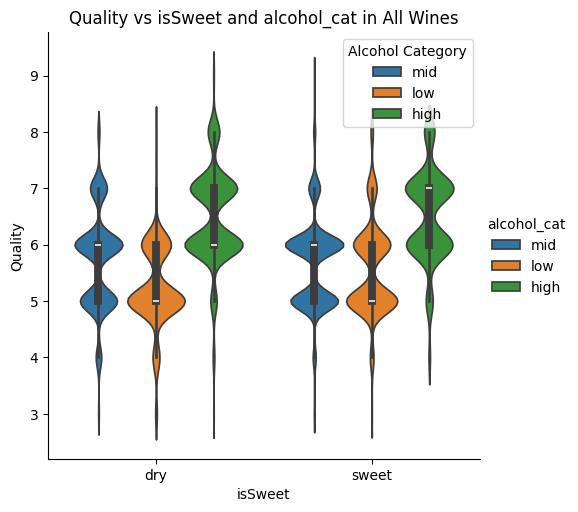

In [ ]:
wine_data = pd.concat([red_wine_data, white_wine_data], axis=0)

plt.figure(figsize=(10, 6))
sns.catplot(x = "isSweet", y = "quality", data = wine_data, kind = "box", hue = "alcohol_cat")
plt.title('Quality vs isSweet and alcohol_cat in All Wines')
plt.xlabel('isSweet')
plt.ylabel('Quality')
plt.legend(title='Alcohol Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.catplot(x = "isSweet", y = "quality", data = wine_data, kind = "violin", hue = "alcohol_cat")
plt.title('Quality vs isSweet and alcohol_cat in All Wines')
plt.xlabel('isSweet')
plt.ylabel('Quality')
plt.legend(title='Alcohol Category')
plt.show()

Adding both the wine datasets the graphs together take the highest ranges from both the graphs and add outliers with lots of datapoints but in same cases old outliers are lost maybe because of other qualities having more values to compensate for old outliers.

##Predicting All Possible Quality Labels

In [ ]:
X = red_wine_data.drop(columns=['quality', "alcohol_cat", "isSweet", "binary_quality"])
y = red_wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



In this we are using all qualities instead of using high or low. This is making some of our accuracy to drop from the earlier 0.73 to now 0.66. Which means that binary classification help with increasing the accuracy

In [ ]:
X = white_wine_data.drop(columns=['quality', "alcohol_cat", "isSweet", "binary_quality"])
y = white_wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.60      0.24      0.34        25
           5       0.70      0.69      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.59      0.46      0.50       980
weighted avg       0.69      0.69      0.68       980



In this we are using all qualities instead of using high or low. This is making some of our accuracy to drop from the earlier 0.70 to now 0.69. Not as much as red wine, maybe because white wine dataset has more datapoints which avoids the accurary to change much.

